# MLP

## Imports

In [1]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

import pydot

import matplotlib.pyplot as plt

## Data load

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Unique number of train label

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
print('Train labels:', dict(zip(unique, counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


Unique numer of test label

In [4]:
unique, counts = np.unique(y_test, return_counts=True)
print('Test labels:', dict(zip(unique, counts)))

Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
num_labels = len(np.unique(y_train))

Image

In [6]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labls = y_train[indexes]

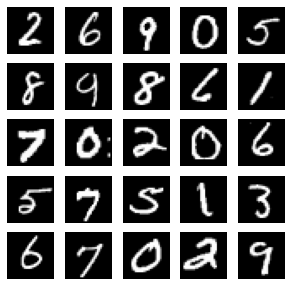

In [7]:
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

## Preprocessing

One-hot vector

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
image_size = x_train.shape[1]
input_size = image_size * image_size

Normalization

In [10]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## Modeling

### Hyperparameter

In [11]:
batch_size = 128
hidden_units = 256
dropout = .45

### Model

In [12]:
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

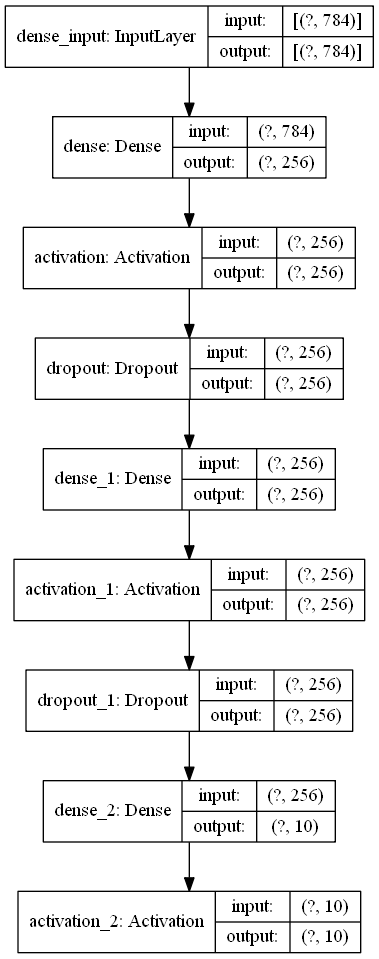

In [13]:
plot_model(model,to_file='mpl-mnist.png', show_shapes=True)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Activation Layer and Loss Function

1. sigmoid
    Logistic sigmoid, 0.0 ~ 1.0, 
2. tanh
    -1.0 ~ 1.0, use RNN layer
    
    When classify categorically use softmax activation layer and then use categorical_crossentropy or mean_sequared_error
    Binary_crossentropy usually use after sigmoid activation layer, and mean_sequared_error use for tanh

### Optimization

1. Optimization aim minimize loss function.
- Stochastic Gradient Descent, SGD
    - if $\epsilon$ is too big, can't find minimum value, or too low, repeat too many times for finding minimum
    - if there are multiple minima, it will traped local minimum
    - Usually not use in DNN because, there are lots of params to train. It is Inefficiency
- Adaptive Moments, Adam
- Root Mean Sequared Propagation, RMSprop
- Param : learning rate, momentum, decay

In [15]:
model.fit(x_train, y_train, epochs=20, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8689
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9420
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1527 - accuracy: 0.9543
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1298 - accuracy: 0.9613
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1156 - accuracy: 0.9642
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9683
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9713
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9739
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9763

In [16]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('\nTest accuracy: %.1f%%'%(100.0*acc))

79/79 [==============================] - 0s 1ms/step - loss: 0.0632 - accuracy: 0.9820

Test accuracy: 98.2%


# CNN

## Imports

In [21]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

## Data load and Preprocessing

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_labels = len(np.unique(y_train))

In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
image_size = x_train.shape[1]
print(image_size)

28


In [34]:
print(x_train.shape)
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [35]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = .2

## Model

In [36]:
model = Sequential()
model.add(Conv2D(filters = filters,
                kernel_size = kernel_size,
                activation = 'relu',
                input_shape = input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                kernel_size = kernel_size,
                activation = 'relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                kernel_size = kernel_size,
                activation = 'relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 576)              

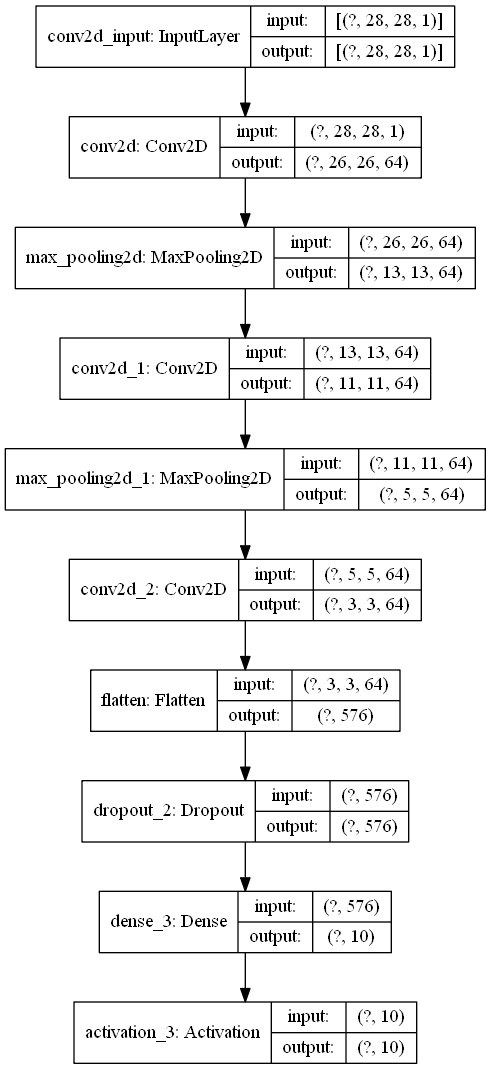

In [37]:
plot_model(model, show_shapes = True)

In [38]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, epochs = 10, batch_size = batch_size)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2614 - accuracy: 0.9210
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0708 - accuracy: 0.9779
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0490 - accuracy: 0.9854
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0409 - accuracy: 0.9866
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0224 - accuracy: 0.9929
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - accuracy: 0.9945

In [41]:
loss, acc = model.evaluate(x_test, y_test, batch_size = batch_size)
print('\nTest accuracy: %.1f%%' % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9919

Test accuracy: 99.2%
